# Feature Scaling




## Why do we need to scale the features?

For ordinary least squares (OLS) regression, the scale of the features does not matter. However, for some other machine learning method that we will introduce later in this class, the magnitude of the features can have a significant impact on the model. 

Many machine learning algorithm require some notion of "similarity" or "distance" between data points in high-dimensional space. For example, one simple method for prediction is to find the data points that are "closest" to the new data point, and then use the target value of those data points to predict the target value of the new data point.

If we consider the Euclidean distance between two data points, the distance between two points $x$ and $y$ in $d$-dimensional space is

$$ \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $$

where $x_i$ and $y_i$ are the $i$-th feature/coordinate of the two data points. If the features are on different scales, then the distance will be dominated by the features with the largest scale.


Even for linear regression, scaling might help with the interpretation of the coefficients. After standardization, all features are measured in standard deviations, so each coefficient represents the expected change in the target variable for a one standard deviation increase in the feature. This makes it possible to compare the magnitudes of the coefficients, as they’re all in the same units (standard deviations of the features).

## Methods 

Let $X$ be the feature vector (one column of the design matrix) and $X'$ to be the scaled feature vector.

Here some scaling methods:

- Min-max scaling: scales the data to be in the range [0, 1]

$$ X' = \frac{X - \min(X)}{\max(X) - \min(X)} $$

- Standardization (z-score scaling): scales the data to have mean 0 and standard deviation 1

$$ X' = \frac{X - \bar{X}}{\sigma_X} $$

where $\bar{X}$ is the sample mean of $X$ and $\sigma_X$ is the sample standard deviation of $X$.

These are linear transformations of the data. Sometimes we also want to transform the data non-linearly. For example, we might want to take the logarithm of the data if the data spans several orders of magnitude.

The following code visualize the histogram of the numerical features in the penguins dataset. Notice that these linear transformations do not change the shape of the distribution of the data. The only change is the x-axis.

If we use standardization, the unit of the data is "x standard deviations from the mean". If we use min-max scaling, the unit of the data is "x percent of the range of the data".

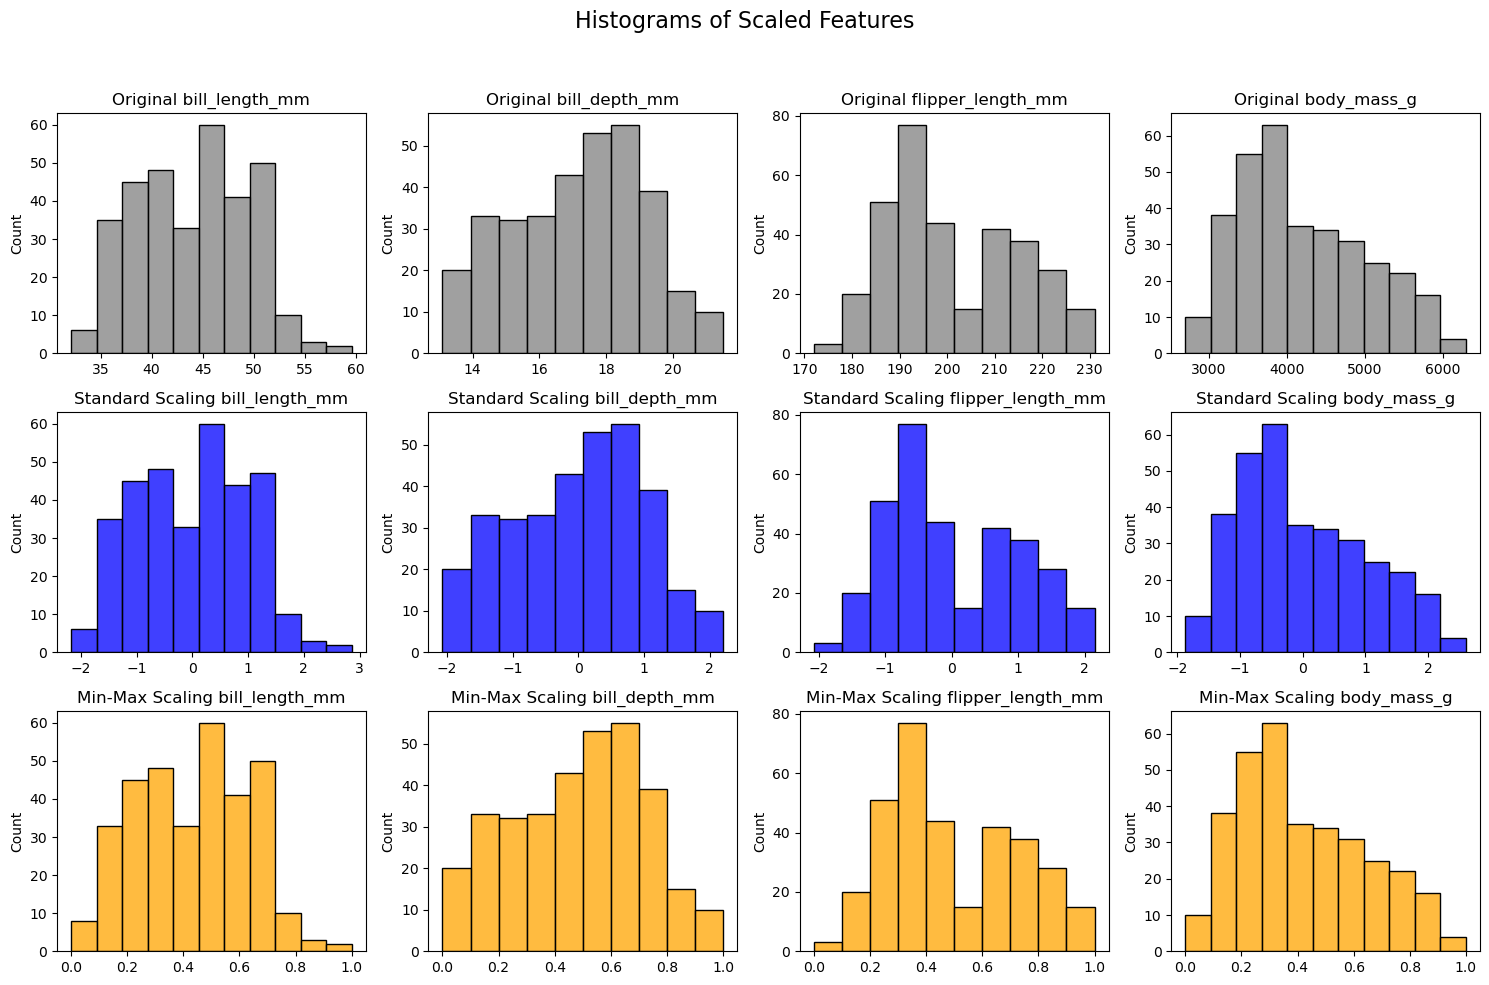

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the Penguins dataset
df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values


# Selecting numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Creating scalers
scalers = {
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

colors = ['gray', 'blue', 'orange']

# Plotting the histograms
fig, axes = plt.subplots(len(scalers) + 1, len(numerical_features), figsize=(15, 10))
fig.suptitle('Histograms of Scaled Features', fontsize=16)

# Original data histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(df[numerical_features[i]], ax=axes[0, i], color=colors[0])
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_xlabel('')

# Scaled data histograms
for row, (name, scaler) in enumerate(scalers.items(), start=1):
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df[numerical_features])
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
    
    for i, feature in enumerate(scaled_df.columns):
        sns.histplot(scaled_df[feature], ax=axes[row, i], color=colors[row])
        axes[row, i].set_title(f'{name} {feature}')
        axes[row, i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplots to fit the title
plt.show()

## Centering and fitting the intercept

In the single variable case, the optimal intercept is given by

$$b^* = \bar{Y}  - w^*\bar{X}$$

- If we center X, then $\bar{X} = 0$
    - if we do not center Y, then $b^* = \bar{Y}$, that is, the intercept is the mean of Y
    - if we center Y, then $b^* = 0$. We don't need to find the intercepts. This can be done by using the `fit_intercept=False` option in the regression model.





In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.linear_model import LinearRegression


df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values


# Selecting numerical features
X = df[['bill_length_mm']]
y = df[['body_mass_g']]


# Fit model without scaling
model = LinearRegression()
model.fit(X, y)
score = model.score(X, y)
print(f"Without Centering X and Y")
print(f"intercept: {model.intercept_.item():.2f}, slope: {model.coef_.item():.2f}, R^2: {score:.2f}")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


# Fit a linear regression model on the scaled data
model.fit(X_scaled, y_scaled)
score = model.score(X_scaled, y_scaled)

print(f"\nstandardizing both X and Y")
print(f"intercept: {model.intercept_.item():.2f}, slope: {model.coef_.item():.2f}, R^2: {score:.2f}")



model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_scaled, y_scaled)
score = model_no_intercept.score(X_scaled, y_scaled)

print(f"\nstandardizing both X and Y, fit_intercept=False")
print(f"intercept: {model_no_intercept.intercept_:.2f}, slope: {model_no_intercept.coef_.item():.2f}, R^2: {score:.2f}")


model.fit(X_scaled, y)
score = model.score(X_scaled, y)
print(f"\nOnly standardizing X")
print(f"intercept: {model.intercept_.item():.2f}, slope: {model.coef_.item():.2f}, R^2: {score:.2f}")
print(f"Y mean: {y.mean().item():.2f}")


Without Centering X and Y
intercept: 388.85, slope: 86.79, R^2: 0.35

standardizing both X and Y
intercept: -0.00, slope: 0.59, R^2: 0.35

standardizing both X and Y, fit_intercept=False
intercept: 0.00, slope: 0.59, R^2: 0.35

Only standardizing X
intercept: 4207.06, slope: 473.92, R^2: 0.35
Y mean: 4207.06
